In [1]:
#IMPORTING NECESSARY MODULES/LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#READING THE CSV FILE
tweets_train = pd.read_csv("C:/Users/ABHISHEK YADAV/Desktop/twitter_training.csv")
tweets_valid = pd.read_csv("C:/Users/ABHISHEK YADAV/Desktop/twitter_validation.csv")

In [5]:
# Naming each column
column_name=['TweetID','Entity','Sentiment','Tweet_Content']
tweets_train.columns=column_name
tweets_valid.columns=column_name
# Combining 2 dataframes to 1 dataframe
tweets=pd.concat([tweets_train,tweets_valid],ignore_index=False)
tweets.head()

,TweetID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
tweets.columns.tolist()

['TweetID', 'Entity', 'Sentiment', 'Tweet_Content']

In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetID        75680 non-null  int64 
 1   Entity         75680 non-null  object
 2   Sentiment      75680 non-null  object
 3   Tweet_Content  74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [8]:
# Data Cleaning
tweets.isnull().sum()

TweetID            0
Entity             0
Sentiment          0
Tweet_Content    686
dtype: int64

In [10]:
tweets.duplicated().sum()

3216

In [11]:
tweets.dropna(inplace=True)
print(tweets.isnull().sum())
tweets.drop_duplicates(inplace=True)
print("Duplicate Values:",tweets.duplicated().sum())

TweetID          0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64
Duplicate Values: 0


In [12]:
# Dropping columns:
tweets.drop(columns=['TweetID','Tweet_Content'],inplace=True)
tweets.head()

,Entity,Sentiment
0,Borderlands,Positive
1,Borderlands,Positive
2,Borderlands,Positive
3,Borderlands,Positive
4,Borderlands,Positive


In [14]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72138 entries, 0 to 995
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Entity     72138 non-null  object
 1   Sentiment  72138 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


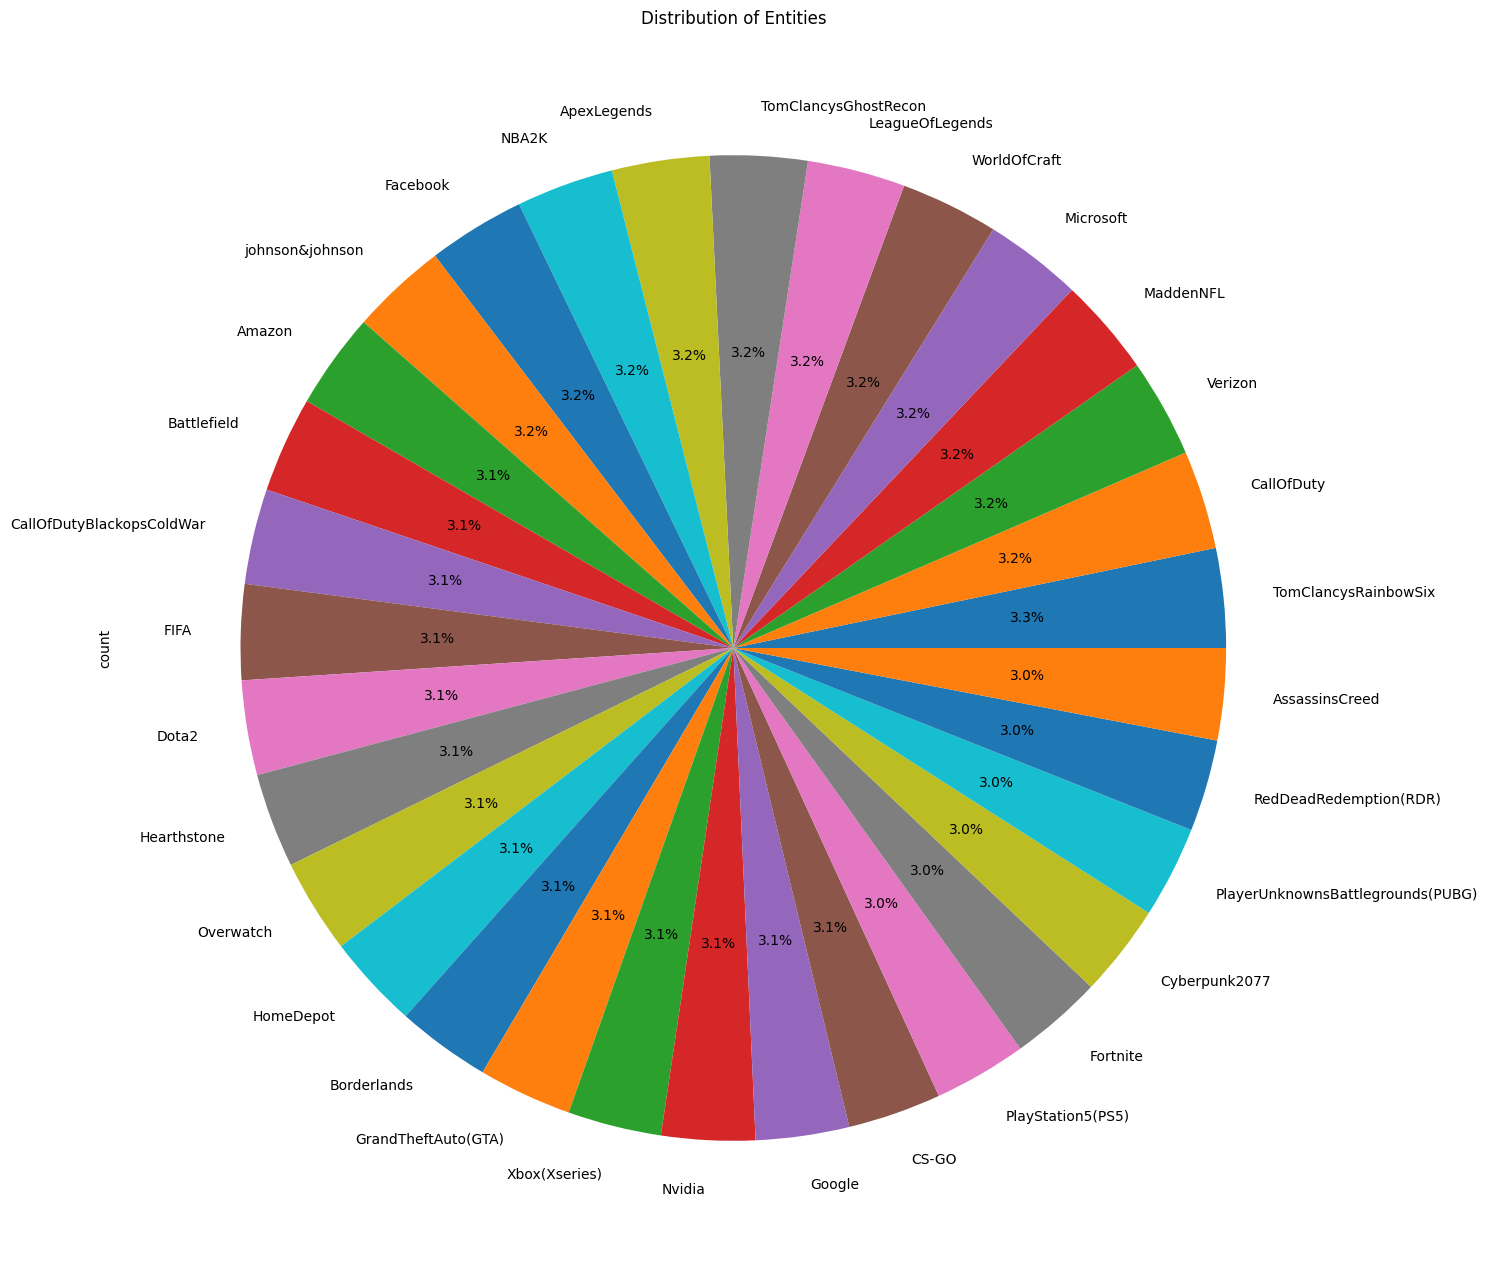

In [16]:
# Data Visualization

entityContent=tweets['Entity'].value_counts()
entityContent.plot(kind='pie', autopct='%1.1f%%', figsize=(20, 16))
plt.title('Distribution of Entities')
plt.show()

<Axes: xlabel='Entity'>

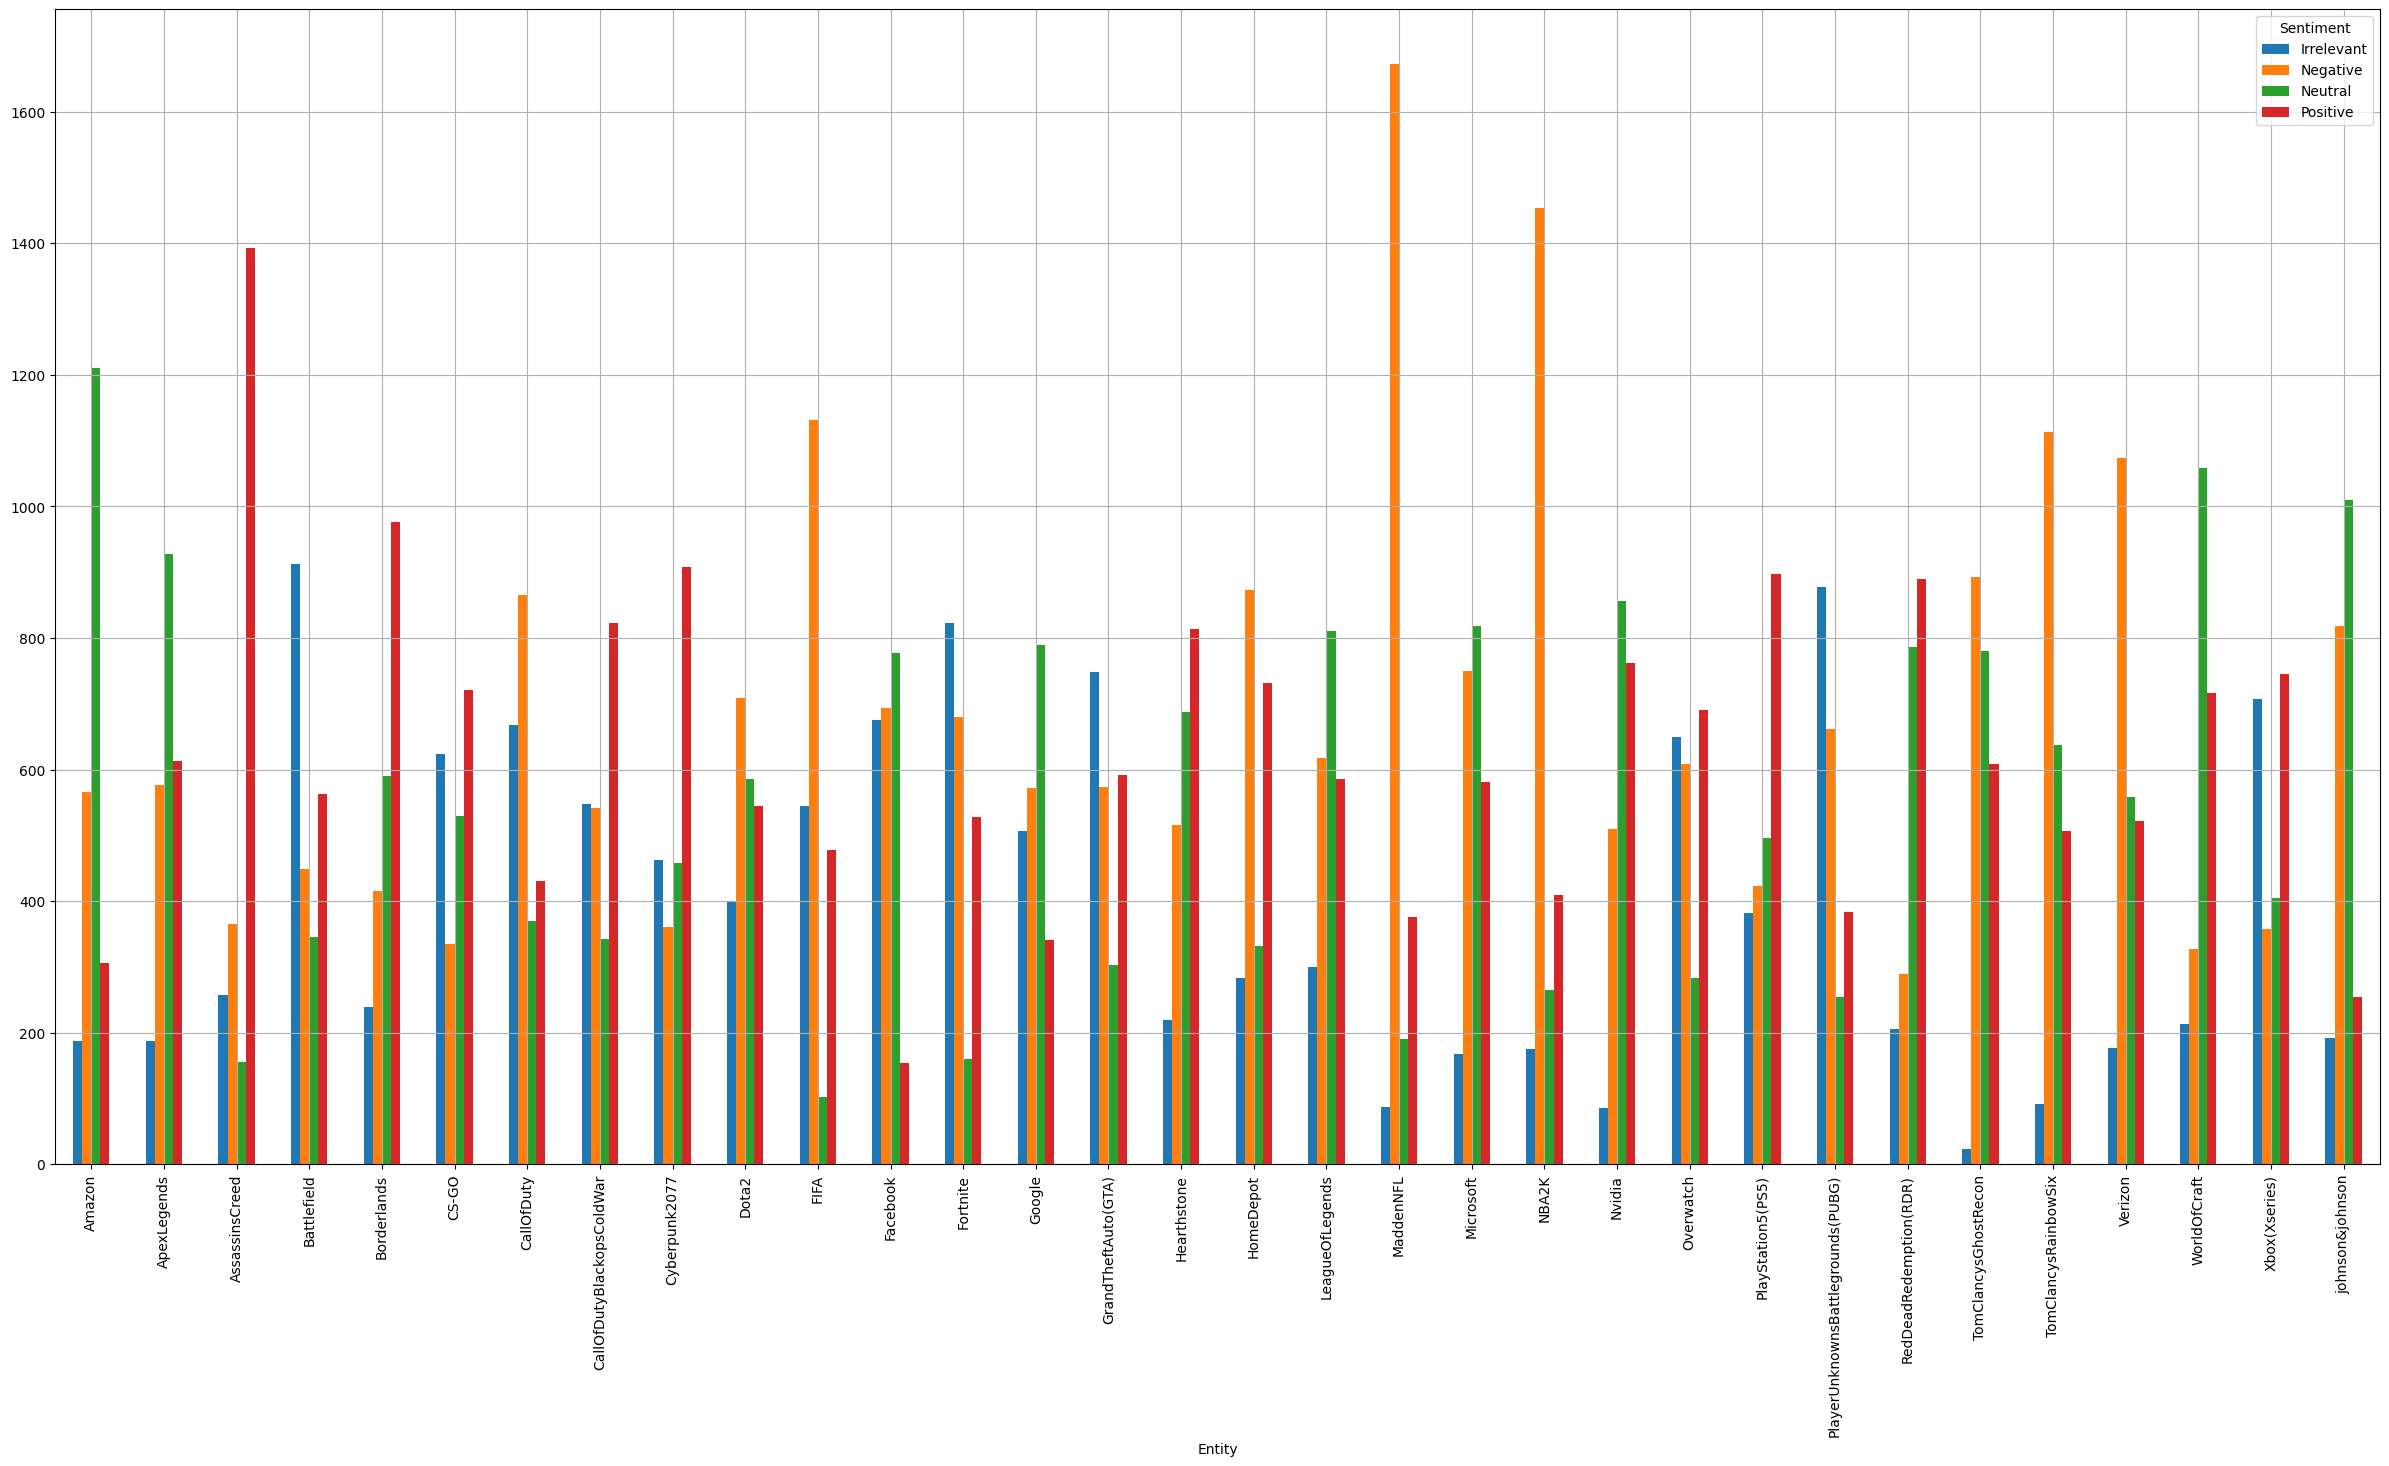

In [24]:
reactionsEntities = pd.crosstab(tweets['Entity'],tweets['Sentiment'])
reactionsEntities.plot(kind='bar', figsize=(30, 15),grid=True)

<Axes: xlabel='Sentiment'>

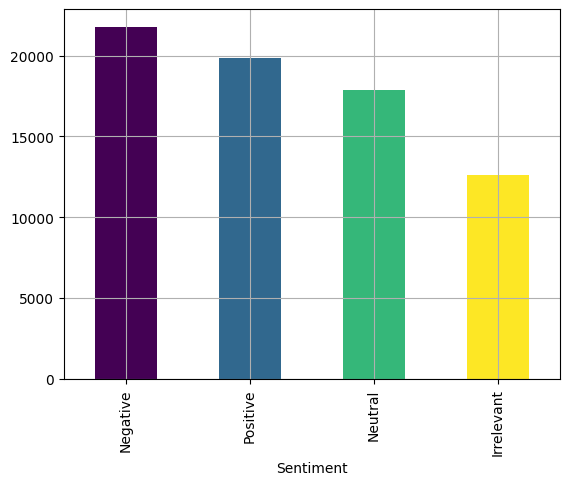

In [20]:
sentimentContent=tweets['Sentiment'].value_counts()
color=plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentimentContent))]
sentimentContent.plot(kind='bar',color=colors,grid=True)

In [25]:
#INSIGHTS / X (Prev Twitter) Users Sentiment Patterns Analysis:

# 1. Amazon had the most neutral response.
# 2. AssassinsCreed had the most positive reactions.

# 3. Battlefield had the most irrelevant feedback.

# 4. MaddenNFL had the most negative reactions.